In [17]:
!pip install salesforce-lavis

In [18]:
import torch
from PIL import Image
import pandas as pd
from lavis.models import load_model_and_preprocess

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
!unzip /content/SPIQA_testA_Images.zip

Archive:  /content/SPIQA_testA_Images.zip
   creating: SPIQA_testA_Images/
   creating: SPIQA_testA_Images/1809.03449v3/
  inflating: SPIQA_testA_Images/1809.03449v3/1809.03449v3-Table3-1.png  
  inflating: SPIQA_testA_Images/1809.03449v3/1809.03449v3-Table1-1.png  
  inflating: SPIQA_testA_Images/1809.03449v3/1809.03449v3-Figure3-1.png  
  inflating: SPIQA_testA_Images/1809.03449v3/1809.03449v3-Figure1-1.png  
  inflating: SPIQA_testA_Images/1809.03449v3/1809.03449v3-Figure4-1.png  
  inflating: SPIQA_testA_Images/1809.03449v3/1809.03449v3-Figure2-1.png  
  inflating: SPIQA_testA_Images/1809.03449v3/1809.03449v3-Table2-1.png  
   creating: SPIQA_testA_Images/1710.01507v4/
  inflating: SPIQA_testA_Images/1710.01507v4/1710.01507v4-Table1-1.png  
  inflating: SPIQA_testA_Images/1710.01507v4/1710.01507v4-Figure1-1.png  
   creating: SPIQA_testA_Images/1709.02755v5/
  inflating: SPIQA_testA_Images/1709.02755v5/1709.02755v5-Table1-1.png  
  inflating: SPIQA_testA_Images/1709.02755v5/1709.02

In [19]:
df = pd.read_csv("/content/sample.csv")
df

,paper,question,answer,reference_figure,reference_figure_caption,generated_answer
0,1611.04684v1,What are the main differences between the educ...,The Bonaparte school focuses on outdoor physic...,1611.04684v1-Table1-1.png,A difficult example from QA,NaN
1,1611.04684v1,Which model performs the best for response sel...,The KEHNN model performs the best for response...,1611.04684v1-Table4-1.png,Table 4: Evaluation results on response selection,NaN
2,1611.04684v1,Which model performs best on the Ubuntu datase...,KEHNN,1611.04684v1-Table5-1.png,Accuracy on different length of text,NaN
3,1611.04684v1,What is the role of the knowledge gates in the...,The knowledge gates are responsible for select...,1611.04684v1-Figure1-1.png,Architecture of KEHNN,NaN
4,1611.04684v1,How does the average number of answers per que...,The training set has a higher average number o...,1611.04684v1-Table2-1.png,Table 2: Statistics of the answer selection da...,NaN
...,...,...,...,...,...,...
661,1809.04276v2,How does the discriminator in the proposed REA...,The discriminator takes as input a response an...,1809.04276v2-Figure1-1.png,Figure 1: An overview of our proposed approach...,NaN
662,1710.01507v4,What is the role of the LSTM network in the mo...,The LSTM network is used to process the post t...,1710.01507v4-Figure1-1.png,Model Architecture,NaN
663,1709.00139v4,Which method generally achieved a lower object...,"For all datasets presented, Incremental SVM ac...",1709.00139v4-Table1-1.png,Table 1: Experimental Results of FISVDD and In...,NaN
664,1809.01989v2,Which method achieved the highest tracking acc...,The Ridge method achieved the lowest sum of ab...,1809.01989v2-Table1-1.png,Table 1. Absolute percentage errors for differ...,NaN


In [23]:
def load_image_and_question(image_path, question):
    path = "/content/SPIQA_testA_Images/" + image_path
    raw_image = Image.open(path).convert("RGB")
    display(raw_image)
    image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
    question = txt_processors["eval"](question)
    return {"image": image, "text_input": question}

In [21]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lavis/models/base_model.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.

Question: What are the main differences between the educational philosophies of the Bonaparte and Voltaire schools?
Actual Answer: The Bonaparte school focuses on outdoor physical activities, maneuvers, and strategies, with a specialization in horse riding, lances, and swords. They aim to develop students into good leaders. The Voltaire school, on the other hand, encourages independent thinking and focuses on indoor activities. They aim to instill good moral values and develop students into philosophical thinkers.


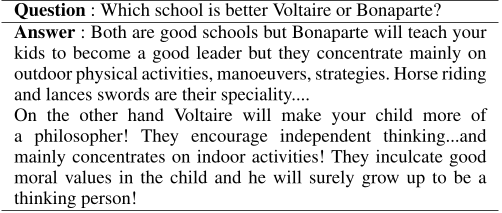

Answer: high school and high school

Question: Which model performs the best for response selection, and how can we tell?
Actual Answer: The KEHNN model performs the best for response selection. This is evident because it achieves the highest scores across all metrics (R$2$@1, R${10}$@1, R${10}$@2, and R${10}$@5) compared to all other models in the table.


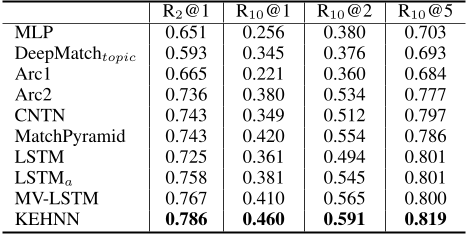

Answer: number of players

Question: Which model performs best on the Ubuntu dataset for text lengths between 60 and 90 words?
Actual Answer: KEHNN


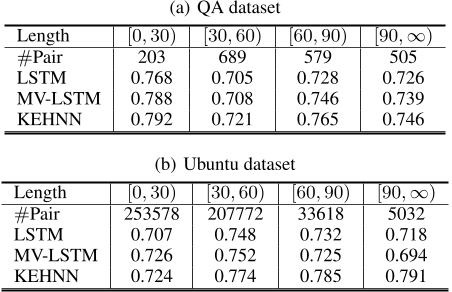

Answer: middle 1

Question: What is the role of the knowledge gates in the KEHNN architecture?
Actual Answer: The knowledge gates are responsible for selecting relevant information from the knowledge base and incorporating it into the model's hidden state.


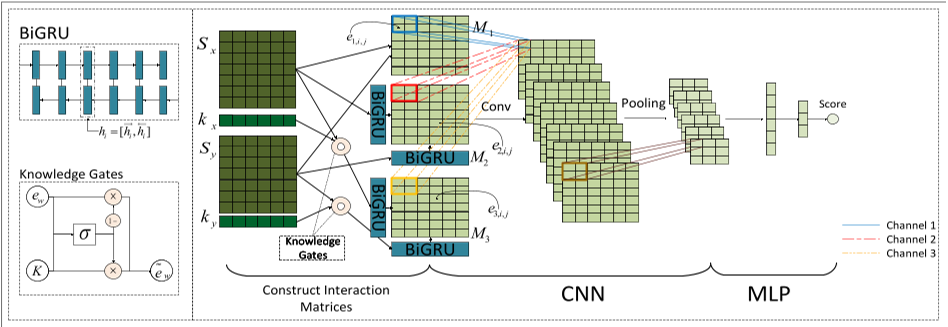

Answer: computer and cell phone

Question: How does the average number of answers per question differ between the training and development sets? What might be a possible explanation for this difference?
Actual Answer: The training set has a higher average number of answers per question (6.36) compared to the development set (5.48). This suggests that questions in the training set tend to have more potential answers associated with them than those in the development set.


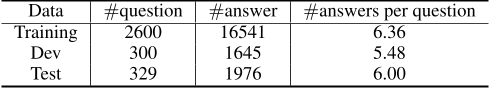

KeyboardInterrupt: 

In [27]:
answers = []
for i, row in df.iterrows():
    image_path = row['paper'] + '/' + row['reference_figure']
    # question = "Given: " + row['reference_figure_caption'].strip() + '\n' + row['question'].strip()
    question = row['question'].strip()
    print("Question:", question)
    print("Actual Answer:", row['answer'].strip())
    with torch.no_grad():
        answer = model.predict_answers(samples=load_image_and_question(image_path, question), inference_method="generate")
        answers.append(answer[0])
    print("Answer:", answer[0])
    print()